# Lab4.House Price Prediction using LR with Regularization

# Step 1: Import Dataset

In [1]:
import pandas as pd
file=pd.read_csv("Ames_House_Sales_Cropped.csv")
file.head()

,BldgType,CentralAir,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,1Fam,Y,856.0,854.0,0.0,3,706.0,0.0,1,0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1Fam,Y,1262.0,0.0,0.0,3,978.0,0.0,0,1,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,1Fam,Y,920.0,866.0,0.0,3,486.0,0.0,1,0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,1Fam,Y,961.0,756.0,0.0,3,216.0,0.0,1,0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1Fam,Y,1145.0,1053.0,0.0,4,655.0,0.0,1,0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0


In [2]:
file.shape

(1379, 39)

In [3]:
file.size

53781

In [4]:
file.info

<bound method DataFrame.info of      BldgType CentralAir  1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  \
0        1Fam          Y     856.0     854.0        0.0             3   
1        1Fam          Y    1262.0       0.0        0.0             3   
2        1Fam          Y     920.0     866.0        0.0             3   
3        1Fam          Y     961.0     756.0        0.0             3   
4        1Fam          Y    1145.0    1053.0        0.0             4   
...       ...        ...       ...       ...        ...           ...   
1374     1Fam          Y     953.0     694.0        0.0             3   
1375     1Fam          Y    2073.0       0.0        0.0             3   
1376     1Fam          Y    1188.0    1152.0        0.0             4   
1377     1Fam          Y    1078.0       0.0        0.0             2   
1378     1Fam          Y    1256.0       0.0        0.0             3   

      BsmtFinSF1  BsmtFinSF2  BsmtFullBath  BsmtHalfBath  ...  OverallQual  \
0          70

In [5]:
file.columns

Index(['BldgType', 'CentralAir', '1stFlrSF', '2ndFlrSF', '3SsnPorch',
       'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath',
       'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath',
       'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass',
       'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'SalePrice'],
      dtype='object')

In [6]:
type(file)

pandas.core.frame.DataFrame

In [7]:
file["SalePrice"].value_counts

<bound method IndexOpsMixin.value_counts of 0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1374    175000.0
1375    210000.0
1376    266500.0
1377    142125.0
1378    147500.0
Name: SalePrice, Length: 1379, dtype: float64>

# Step 2:Predict Sale Price Without Categorical features

In [8]:
#1.Drop both categorical features-BldgType and CentralAir(use drop() and pop() methods)
dff=file.drop(["BldgType","CentralAir"],axis=1)
dff

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,6,0.0,0.0,7,953.0,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010,142125.0


In [9]:
file.pop("BldgType")

0       1Fam
1       1Fam
2       1Fam
3       1Fam
4       1Fam
        ... 
1374    1Fam
1375    1Fam
1376    1Fam
1377    1Fam
1378    1Fam
Name: BldgType, Length: 1379, dtype: object

In [10]:
file.pop("CentralAir")

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1374    Y
1375    Y
1376    Y
1377    Y
1378    Y
Name: CentralAir, Length: 1379, dtype: object

In [11]:
#2.Prepare X matrix and y vector
X=dff.drop(["SalePrice"],axis=1)
X

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,5,7,0.0,0.0,8,856.0,0.0,2003,2003,2008
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,8,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,5,7,0.0,0.0,6,920.0,0.0,2001,2002,2008
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,5,7,0.0,0.0,7,756.0,0.0,1915,1970,2006
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,5,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,5,6,0.0,0.0,7,953.0,0.0,1999,2000,2007
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,6,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,9,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,6,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010


In [12]:
y=dff["SalePrice"].values
y

array([208500., 181500., 223500., ..., 266500., 142125., 147500.])

In [13]:
#3.Split dataset for training and testing as X_train,X_test,y_train,y_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [14]:
#4.Create Linear Regression model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
y_pred=reg.predict(X_test)
y_pred

array([257434.93050745, 111083.7347476 , 100018.05832303, 204028.53821314,
       207319.25418312,  38036.30928932, 234153.38582869, 205076.12689608,
       187014.1265524 , 235636.78799032, 100976.50943769, 304119.53646983,
       101769.64600714, 288758.46001593, 204767.89338328, 145002.47279616,
       248322.97436852, 151533.68038634, 209697.39458713, 278312.23574149,
        93329.85601474, 153784.14868375, 163237.87451138, 241495.9121289 ,
       372429.94726945, 221672.07367609, 119658.75685737, 100039.78137073,
       319435.0289208 , 172088.64665031, 258772.64470117, 199597.36129642,
       156349.69283212, 142311.22500101, 204807.33161322, 379608.17785444,
       124176.23377551, 141127.25006141, 273832.43247645, 212547.04205553,
       169474.57176142, 123305.65719312, 200341.24016791, 377957.32307114,
       146941.7171239 , 283693.48760668, 106694.19786718, 221733.02172508,
        87733.47014004, 295005.66546306, 125250.62019285,  53569.11256023,
       133831.0508612 , 1

In [16]:
#5.Compute Mean Squared Error(MSE) on actual values and predicted values
import sklearn.metrics as metrics
mse=metrics.mean_squared_error(y_test,y_pred)
print("MSE without Categorical: ",mse)

MSE without Categorical:  1474827325.5975435


# Step 3:Create scatter Plot

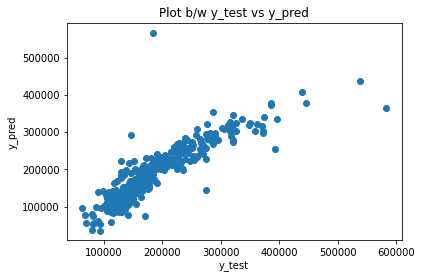

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Plot b/w y_test vs y_pred")
plt.show()

# Step 4:Encode Categorical Columns

In [18]:
encoding=pd.get_dummies(file)
encoding

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,6,0.0,0.0,7,953.0,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010,142125.0


# Step 5:Predict Sale Price with Categorical Features

In [19]:
#1.prepare X matrix and Y vector
X=encoding.drop(["SalePrice"],axis=1)
X

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,5,7,0.0,0.0,8,856.0,0.0,2003,2003,2008
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,8,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,5,7,0.0,0.0,6,920.0,0.0,2001,2002,2008
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,5,7,0.0,0.0,7,756.0,0.0,1915,1970,2006
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,5,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,5,6,0.0,0.0,7,953.0,0.0,1999,2000,2007
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,6,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,9,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,6,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010


In [20]:
y=encoding["SalePrice"].values
y

array([208500., 181500., 223500., ..., 266500., 142125., 147500.])

In [21]:
#2.split dataset for training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [22]:
#3.Create Linear Regression model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print(y)

[208500. 181500. 223500. ... 266500. 142125. 147500.]


In [23]:
#4.Compute Mean Squared error on actual values and predicted values
mse_cd=metrics.mean_squared_error(y_test,y_pred)
print("MSE with Categorical data: ",mse_cd)

MSE with Categorical data:  1474827325.5975435


# Step 6: Normalize using StandardScaler and Predict Sale Price

In [24]:
#1.Perform Fit_transform() on x_train and trasnform() on x_test matrix
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss_X_train=ss.fit_transform(X_train)
ss_X_train

array([[ 0.39851037, -0.79290427, -0.11340519, ...,  0.84304574,
         0.65341548,  0.11447318],
       [ 1.57467708, -0.79290427, -0.11340519, ...,  1.14796951,
         1.04559751,  0.8683921 ],
       [ 0.37564751,  0.70143387, -0.11340519, ..., -1.52858358,
        -1.74869949,  0.8683921 ],
       ...,
       [ 1.22157303, -0.79290427, -0.11340519, ..., -0.61381227,
         0.50634721,  0.11447318],
       [-1.11297817,  0.90510323, -0.11340519, ...,  1.08020867,
         0.947552  ,  0.8683921 ],
       [ 0.11145456, -0.79290427, -0.11340519, ...,  0.87692616,
         0.65341548,  0.8683921 ]])

In [25]:
ss_X_test=ss.transform(X_test)
ss_X_test

array([[ 0.85830772, -0.79290427, -0.11340519, ...,  1.01244784,
         0.89852925,  0.11447318],
       [-0.64810018, -0.79290427, -0.11340519, ..., -0.27500808,
        -1.01335818,  0.8683921 ],
       [-0.21624632,  0.76093278, -0.11340519, ..., -2.47723531,
        -1.74869949, -1.39336465],
       ...,
       [-0.04350477,  0.37647826, -0.11340519, ..., -1.86738777,
        -1.74869949,  0.11447318],
       [-0.64301955,  1.46805451, -0.11340519, ...,  0.63976323,
         0.31025619, -1.39336465],
       [-0.29499614,  0.81585486, -0.11340519, ...,  0.47036113,
         0.06514242, -1.39336465]])

In [26]:
#2.Create a new Linear Regression Model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(ss_X_train,y_train)
ss_y_pred=lr.predict(ss_X_test)
ss_y_pred

array([257434.93050748, 111083.73474764, 100018.0583229 , 204028.53821316,
       207319.25418314,  38036.3092894 , 234153.38582869, 205076.12689603,
       187014.12655231, 235636.78799029, 100976.5094378 , 304119.53646984,
       101769.64600715, 288758.46001591, 204767.89338331, 145002.4727962 ,
       248322.97436853, 151533.68038638, 209697.39458715, 278312.23574155,
        93329.85601463, 153784.1486838 , 163237.87451135, 241495.91212888,
       372429.94726951, 221672.07367603, 119658.75685733, 100039.78137072,
       319435.02892076, 172088.64665032, 258772.64470115, 199597.36129638,
       156349.69283197, 142311.22500108, 204807.33161322, 379608.17785439,
       124176.23377553, 141127.25006143, 273832.43247648, 212547.0420556 ,
       169474.57176143, 123305.65719309, 200341.24016795, 377957.32307109,
       146941.7171239 , 283693.48760665, 106694.19786715, 221733.02172498,
        87733.4701401 , 295005.66546303, 125250.6201929 ,  53569.11256027,
       133831.05086115, 1

In [27]:
#3.Compute Mean Squared Error(MSE)
ss_mse=metrics.mean_squared_error(y_test,ss_y_pred)
print("SS_MSE: ",ss_mse)

SS_MSE:  1474827325.5975826


# Step 7:Normalize using MinMaxScaler and predict Sale Price

In [28]:
#1.Repeat Step6 using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm_X_train=mm.fit_transform(X_train)
mm_X_test=mm.transform(X_test)
mm_lr=LinearRegression()
mm_lr.fit(mm_X_train,y_train)
mm_y_pred=mm_lr.predict(mm_X_test)
print("Predictions of scaled data using MinMaxScaler:",mm_y_pred)

Predictions of scaled data using MinMaxScaler: [257434.93050748 111083.73474764 100018.0583229  204028.53821316
 207319.25418314  38036.3092894  234153.38582869 205076.12689603
 187014.12655231 235636.78799029 100976.5094378  304119.53646984
 101769.64600715 288758.46001591 204767.89338331 145002.4727962
 248322.97436853 151533.68038638 209697.39458715 278312.23574155
  93329.85601463 153784.1486838  163237.87451135 241495.91212888
 372429.94726951 221672.07367603 119658.75685733 100039.78137072
 319435.02892076 172088.64665032 258772.64470115 199597.36129638
 156349.69283197 142311.22500108 204807.33161322 379608.17785439
 124176.23377553 141127.25006143 273832.43247648 212547.0420556
 169474.57176143 123305.65719309 200341.24016795 377957.32307109
 146941.7171239  283693.48760665 106694.19786715 221733.02172498
  87733.4701401  295005.66546303 125250.6201929   53569.11256027
 133831.05086115 170901.42929711 213273.17757298 110818.14723239
 103893.81849705 200665.21921041 137764.84464

In [29]:
#2.Mean Square Error
mm_mse=metrics.mean_squared_error(y_test,mm_y_pred)
print("MM_MSE: ",mm_mse)

MM_MSE:  1474827325.5975814


# Step 8:Predict using SGD Regressor

In [30]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(ss_X_train, y_train)
sgd_y_pred=sgd.predict(ss_X_test)
print("Predictions of scaled data using SGDRegressor:", sgd_y_pred)

Predictions of scaled data using SGDRegressor: [256063.33898072 105562.58550819 108382.58857727 202059.12620896
 209608.38959032  33905.74163892 238106.36853166 205093.81963665
 185511.09807809 226372.77196466  93536.94405701 298807.06728096
 102349.73005502 297667.57526169 213930.10959292 151256.11115813
 243648.16051403 150699.04933605 212923.76940956 277024.37802349
  94298.95519335 149151.31163646 160209.18137323 241077.43685096
 385298.94619011 217700.70745392 120393.29837577  92411.04250777
 328689.51517701 172605.7594976  248221.20489229 203271.77991682
 144820.6431271  135891.16591461 208294.68030384 377162.15810906
 112508.14620643 135602.86375678 269584.84505944 209416.72071053
 168754.89663759 120559.53018607 191493.48294034 387299.4988681
 154204.72480549 288524.9407117   96767.62462528 223391.6939195
  78688.20454792 303310.79040622 120264.75604512  49364.34979184
 136683.49744361 162189.26585649 209434.35553005 113133.60406038
 105943.28854    207443.09355978 140098.16398

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [31]:
sgd_mse=metrics.mean_squared_error(y_test, sgd_y_pred)
print("SGD_MSE:",sgd_mse)

SGD_MSE: 1474166433.1139765


# Step-8:[Predict using Ridge Regressor]

In [32]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(ss_X_train, y_train)
ridge_y_pred=ridge.predict(ss_X_test)
print("Predictions of scaled data using RIDGERegression:", ridge_y_pred)

Predictions of scaled data using RIDGERegression: [257421.40327467 111048.93900918 100148.22166502 204007.69016285
 207318.26438778  38130.16627273 234150.19679274 205083.79807217
 186990.35389928 235496.28665193 100966.52935332 303934.63164847
 101890.94872879 288779.98473831 204801.28875069 145108.44985327
 248228.38505616 151485.3620995  209733.2274515  278197.43944221
  93455.66093259 153804.93005254 163194.49635267 241430.2463605
 372368.42646834 221632.71135779 119760.90284387 100047.58843771
 319413.64552184 172029.21920287 258742.7512024  199493.44526659
 156253.40634584 142260.62082583 204826.1806726  379453.76863261
 124049.03967105 140938.68021813 273742.38050574 212502.29963116
 169496.97954299 123279.27640286 200131.43501379 377624.34223268
 147067.67507791 283730.24445742 106654.11168627 221721.98335033
  87859.6015935  294987.18055758 125202.71399397  53519.12559123
 133851.65120566 170814.11457786 213257.89409118 110890.21052619
 103962.51733658 200705.10120865 137825.9

In [33]:
ridge_mse=metrics.mean_squared_error(y_test, ridge_y_pred)
ridge_r2=metrics.r2_score(y_test, sgd_y_pred)
print("RIDGE_MSE:",ridge_mse)

RIDGE_MSE: 1473019452.6343968


# Step-8:[Predict using Lasso Regression]

In [34]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(ss_X_train, y_train)
lasso_y_pred=lasso.predict(ss_X_test)
print("Predictions of scaled data using LASSORegression:", lasso_y_pred)

Predictions of scaled data using LASSORegression: [257421.66197135 111077.71879469 100035.6191829  204024.7169887
 207324.54758555  38037.76044559 234149.07629388 205067.06537765
 186995.76236831 235644.9892929  100980.81814107 304124.32600883
 101772.17918346 288771.22252734 204759.49619808 145026.2155349
 248321.68441805 151528.08346291 209694.08183559 278309.14448672
  93335.15311431 153783.56780017 163228.65012312 241483.60508861
 372429.51050608 221679.58601399 119671.76786021 100045.46561762
 319437.725821   172082.33265962 258777.40797254 199570.17239129
 156363.52609123 142320.7170313  204809.98100164 379595.39611426
 124166.56112343 141099.38504814 273833.85728474 212527.67447459
 169476.63411535 123302.15760227 200345.31641435 377933.4095104
 146945.90334484 283683.39848157 106687.15479997 221733.41564452
  87730.76613378 295006.80358316 125244.58525479  53575.54835405
 133831.34643938 170889.49976251 213275.46196983 110829.42033236
 103891.6332743  200669.15236764 137760.967

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [35]:
lasso_mse=metrics.mean_squared_error(y_test, lasso_y_pred)
print("LASSO_MSE:",lasso_mse)

LASSO_MSE: 1474731226.776707


# Step-9:[RMSE]

In [36]:
import numpy as np
#RMSE without one hot encoding
print("RMSE without one hot encoding: ",np.sqrt(mse))
#RMSE with one hot encoding
print("RMSE with one hot encoding: ",np.sqrt(mse_cd))
#RMSE with OHE and Standard Scaling
print("RMSE with OHE and Standard Scaling: ",np.sqrt(ss_mse))
#RMSE with OHE and MinMaxScaling
print("RMSE with OHE and MinMaxScaling: ",np.sqrt(mm_mse))
#RMSE of SGDRegressor with OHE and StandardScaler 
print("RMSE of SGDRegressor with OHE and StandardScaler: ",np.sqrt(sgd_mse))
#RMSE of Ridgecv with OHE and Standard Scaler
print("RMSE of Ridgecv with OHE and Standard Scaler: ",np.sqrt(ridge_mse))
#RMSE of LassoCV with OHE and StandardScaler
print("RMSE of LassoCV with OHE and StandardScaler",np.sqrt(lasso_mse))

RMSE without one hot encoding:  38403.480644305455
RMSE with one hot encoding:  38403.480644305455
RMSE with OHE and Standard Scaling:  38403.480644305964
RMSE with OHE and MinMaxScaling:  38403.48064430594
RMSE of SGDRegressor with OHE and StandardScaler:  38394.875089183144
RMSE of Ridgecv with OHE and Standard Scaler:  38379.93554755397
RMSE of LassoCV with OHE and StandardScaler 38402.2294506023
